# Modal analysis - 1r

In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.rModel(2,3)
n = mdl.dnodes
e = mdl.delems
w = 24
h = 12

mdl.frame((1,w), (3,h))

for node in n.values():
    mdl.fix(node, 'rz')
    
n['4'].mass = 1
n['6'].mass = 1
n['8'].mass = 0.5
mdl.fix(n['1'], ['x', 'y'])
mdl.fix(n['2'], ['x', 'y'])

mdl.DOF = [[10, 11, 12], [13, 14, 15], 
           [ 1, 11,  4], [ 1, 14,  5], 
           [ 2, 11,  6], [ 2, 14,  7], 
           [ 3, 11,  8], [ 3, 14,  9]]

## Part a)

In [3]:
K = em.K_matrix(mdl)
M = em.Mass_matrix(mdl)
K.f*h**3

,0,1,2
0,48.0,-24.0,0.0
1,-24.0,48.0,-24.0
2,0.0,-24.0,24.0


In [4]:
M.f

,$u_{{1}}$,$u_{{2}}$,$u_{{3}}$
$u_{{1}}$,1.0,0.0,0.0
$u_{{2}}$,0.0,1.0,0.0
$u_{{3}}$,0.0,0.0,0.5


## Part b)

In [5]:
shapes = em.analysis.ModalAnalysis(mdl)

In [6]:
shapes

(array([0.05183404+0.j, 0.02777778+0.j, 0.00372152+0.j]),
 array([[ 4.08248290e-01, -8.16496581e-01, -4.08248290e-01],
        [-7.07106781e-01, -3.10316769e-16, -7.07106781e-01],
        [ 8.16496581e-01,  8.16496581e-01, -8.16496581e-01]]))

In [7]:
U = em.U_vector(em.A_matrix(mdl))

No handles with labels found to put in legend.


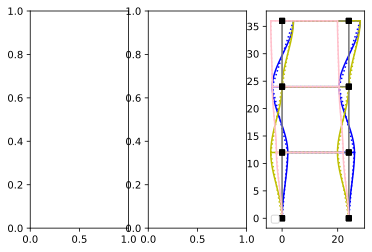

In [8]:
colors = ['b', 'y','pink']
fig, ax = plt.subplots(1,3)
for i, shape in enumerate(shapes[1].T):
    U[0:3] = shape
    em.plot_modes(mdl, U, ax[i], color=colors[i], label=str(i+1))
plt.legend();

## Part c) Verify orthogonality

In [9]:
phis = np.around(shapes[1], 7)
phis

array([[ 0.4082483, -0.8164966, -0.4082483],
       [-0.7071068, -0.       , -0.7071068],
       [ 0.8164966,  0.8164966, -0.8164966]])

In [10]:
print(phis[:,0] @ M.f @ phis[:,1])

0.0


In [11]:
print(phis[:,0] @ M.f @ phis[:,2])

3.2475700462164525e-09


In [12]:
print(phis[:,1] @ M.f @ phis[:,2])

0.0


## Part d) Normalize modes.

Each mode shape is normalized so that when multiplied by the problem variable, $\frac{1}{\sqrt{m}}$, they will generate a modal mass matrix, $M_n$, equal to the identity matrix.

In [13]:
phi_n = np.zeros((3,3))
phi_n[:,0] = phis[:,0]/((phis[:,0] @ M.f @ phis[:,0]))**(1/2)
print(phi_n[:,0])
phi_n[:,0].T @ M.f @ phi_n[:,0]

[ 0.40824829 -0.70710678  0.81649658]


C:\Users\claud\Anaconda3\lib\site-packages\IPython\core\formatters.py:371: FormatterWarning: text/html formatter returned invalid type <class 'ema.utilities.Structural_Vector'> (expected <class 'str'>) for object: Structural_Vector(1.)
  FormatterWarning


Structural_Vector(1.)

In [14]:
phi_n[:,1] = phis[:,1]/((phis[:,1] @ M.f @ phis[:,1]))**(1/2)
print(phi_n[:,1])
phi_n[:,1].T @ M.f @ phi_n[:,1]

[-0.81649658 -0.          0.81649658]


Structural_Vector(1.)

In [15]:
phi_n[:,2] = phis[:,2]/((phis[:,2] @ M.f @ phis[:,2]))**(1/2)
print(phi_n[:,2])
phi_n[:,2].T @ M.f @ phi_n[:,2]

[-0.40824829 -0.70710678 -0.81649658]


Structural_Vector(1.)

In [16]:
Id = np.around(phi_n.T @ M.f @ phi_n,7)
Id

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])